# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

# Loading Dataset

In [3]:
df = pd.read_csv('codsoft_task3/IRIS.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Preprocessing

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.duplicated().sum()

3

In [10]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(147, 5)

# Data Visualization

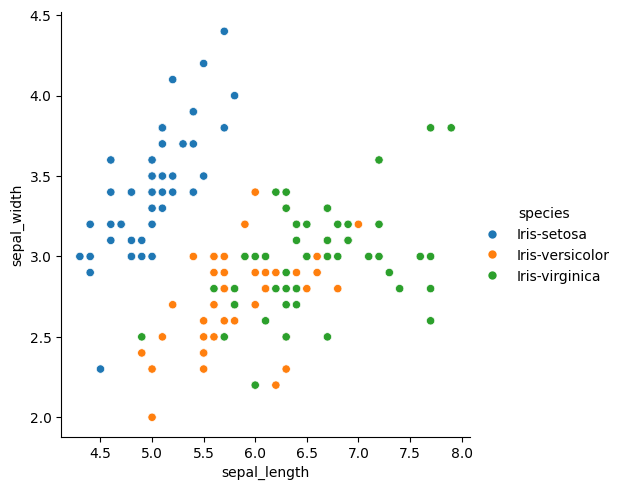

In [14]:
sns.relplot(data = df, x = 'sepal_length', y = 'sepal_width', kind = 'scatter', hue = "species")

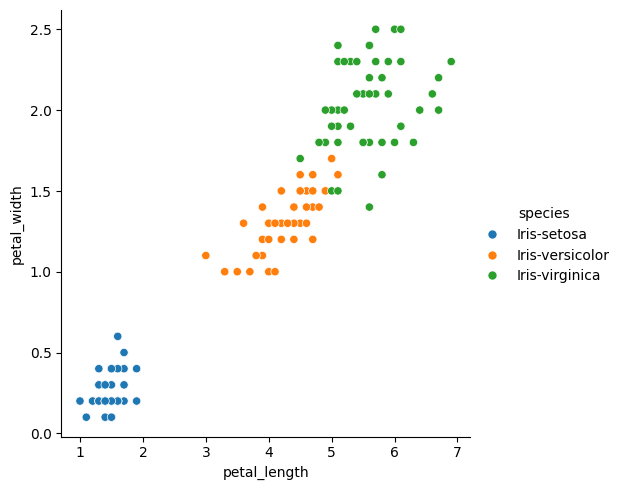

In [15]:
sns.relplot(data = df, x = 'petal_length', y = 'petal_width', kind = 'scatter', hue = "species")

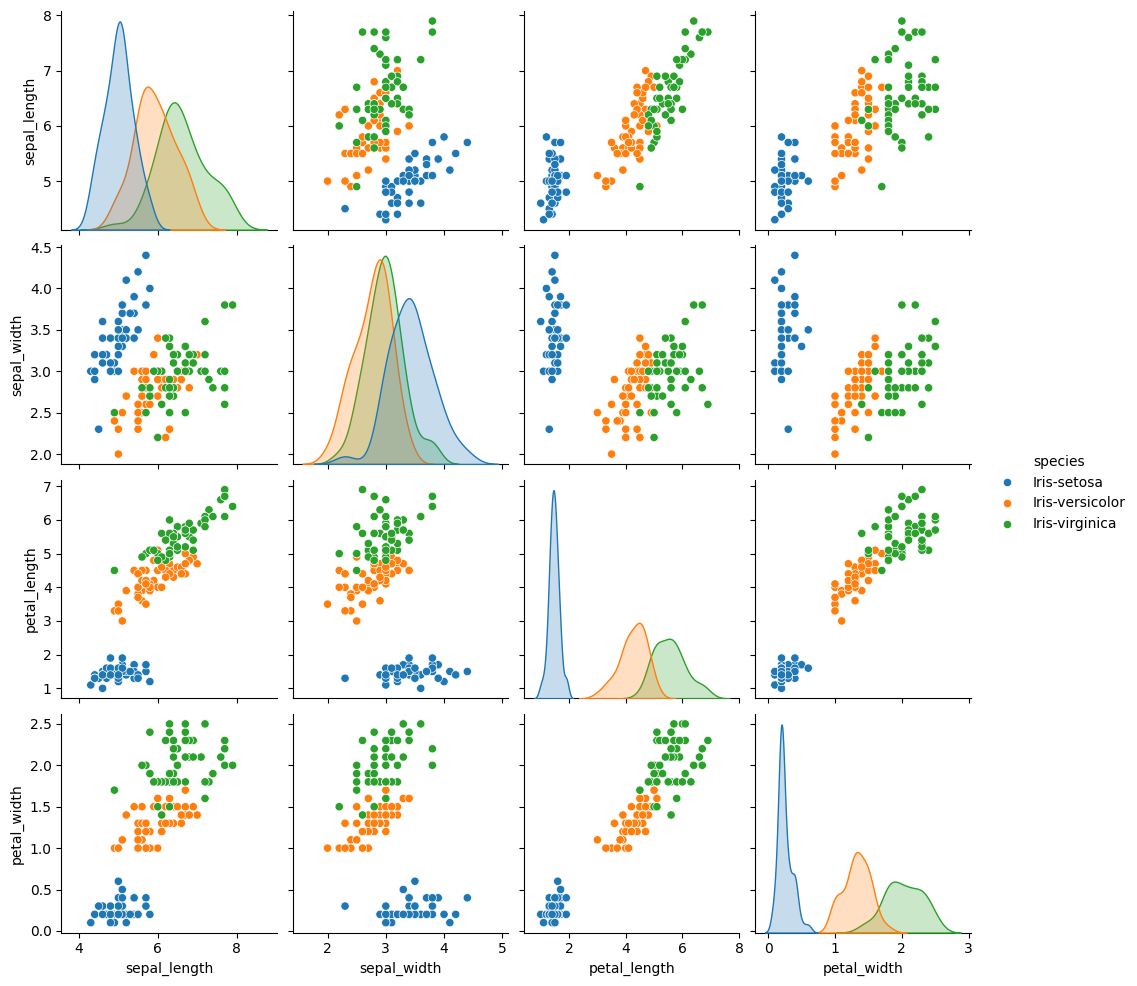

In [16]:
sns.pairplot(df, hue = 'species')

<Axes: >

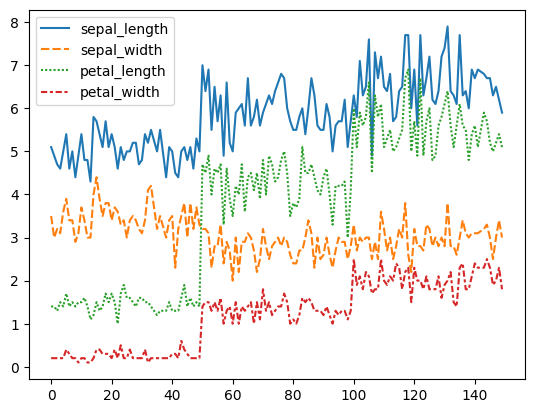

In [17]:
sns.lineplot(data = df.drop(columns=['species']))

In [18]:
x = df[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## splitting the dataset into training and testing set

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((102, 4), (45, 4), (102,), (45,))

# RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [23]:
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
rfc_pred = classifier.predict(x_test)

In [26]:
print("RandomForestClassifier Accuracy : ",accuracy_score(y_test, rfc_pred))

RandomForestClassifier Accuracy :  0.9555555555555556


In [27]:
print("Confusion Matrix of RandomForestClassifier : ")
print(confusion_matrix(y_test, rfc_pred))

Confusion Matrix of RandomForestClassifier : 
[[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]


In [28]:
print("Classification Report of RandomForestClassifier : ")
print(classification_report(y_test, rfc_pred))

Classification Report of RandomForestClassifier : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



# LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [30]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [31]:
lr_pred = lr_model.predict(x_test)

In [32]:
print("LogisticRegression Accuracy : ",accuracy_score(y_test, lr_pred))

LogisticRegression Accuracy :  0.9333333333333333


In [34]:
print("Confusion Matrix of LogisticRegression : ")
print(confusion_matrix(y_test, lr_pred))

Confusion Matrix of LogisticRegression : 
[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


In [35]:
print("Classification Report of LogisticRegression : ")
print(classification_report(y_test, lr_pred))

Classification Report of LogisticRegression : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [36]:
# function for manual testing

def manual_testing(sl, sw, pl, pw):
  temp = {'sepal_length' : [sl], 'sepal_width' : [sw], 'petal_length' : [pl], 'petal_width' : [pw]}
  value = pd.DataFrame(temp)
  result = classifier.predict(value)
  print("Speacies is : ", result[0])

In [38]:
sl = float(input("Enter sepal_length : "))
sw = float(input("Enter sepal_width : "))
pl = float(input("Enter petal_length : "))
pw = float(input("Enter petal_length : "))
manual_testing(sl, sw, pl, pw)

Enter sepal_length : 3.5
Enter sepal_width : 5.1
Enter petal_length : 0.2
Enter petal_length : 1.5
Speacies is :  Iris-versicolor
